<a href="https://colab.research.google.com/github/rsadaphule/llm/blob/main/LangChain_for_generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
!pip install OpenAI langchain transformers langchain_openai langchain_anthropic langchain_core langchain_community

In [249]:
!pip install watermark

In [250]:
from collections import Counter
from pprint import pprint
from operator import itemgetter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

import openai
from openai import OpenAI

import transformers
from transformers import pipeline
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results


import langchain
from langchain.chains import create_sql_query_chain
from langchain.tools import DuckDuckGoSearchRun

import langchain_openai
from langchain_openai import ChatOpenAI

import langchain_anthropic
from langchain_anthropic import ChatAnthropic


import langchain_core
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder, PromptTemplate
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.runnables import RunnablePassthrough

import langchain_community
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_community.utilities import SQLDatabase
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [251]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

matplotlib         : 3.7.1
langchain_core     : 0.2.9
langchain_anthropic: 0.1.15
requests           : 2.31.0
PIL                : 9.4.0
transformers       : 4.41.2
langchain          : 0.2.5
langchain_openai   : 0.1.9
langchain_community: 0.2.5
pandas             : 2.0.3
watermark          : 2.4.3
numpy              : 1.25.2
torch              : 2.3.0+cu121
openai             : 1.35.3



In [252]:
!git clone https://github.com/DataForScience/LangChain

fatal: destination path 'LangChain' already exists and is not an empty directory.


In [253]:
!pwd

/content


In [254]:
plt.style.use('/content/LangChain/d4sci.mplstyle')

In [255]:
import os

os.environ['OPENAI_API_KEY'] = f'xxxx'

In [256]:
client = OpenAI()

In [257]:
%%time
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "what was superman's weakness?"},
    ],
)

CPU times: user 51.4 ms, sys: 6.19 ms, total: 57.6 ms
Wall time: 2.13 s


In [258]:
response.choices[0].message.content

'Superman\'s primary weakness is Kryptonite, a mineral from his home planet, Krypton. Different colors of kryptonite have varying effects, but green kryptonite is the most well-known and harmful to him, causing extreme pain, weakening him severely, and potentially leading to death with prolonged exposure.\n\nAnother significant weakness of Superman is red sun radiation, which nullifies his powers, as opposed to the yellow sun radiation from Earth\'s sun that grants him his superhuman abilities. Additionally, while not a traditional "weakness," Superman\'s strong moral code and compassion can sometimes be exploited by his enemies to manipulate him.'

In [259]:
%%time
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "what was superman's weakness?"},
    ],
    n=3
)

for output in response.choices:
    print(output.message.role.title())
    print(output.message.content)



Assistant
Superman's most well-known weakness is Kryptonite, a radioactive mineral from his home planet, Krypton. When exposed to Kryptonite, Superman's powers are significantly weakened, and prolonged exposure can be fatal to him. 

In addition to Kryptonite, Superman has a few other vulnerabilities:

1. **Red Sun Radiation**: Superman derives his powers from Earth's yellow sun. Exposure to red sun radiation, similar to the conditions of Krypton’s sun, can strip him of his powers and make him as vulnerable as an ordinary human.

2. **Magic**: Superman is susceptible to magical attacks and enchantments, which can bypass his usual invulnerability.

3. **Psychological Weaknesses**: Superman's strong moral code and his care for his loved ones and humanity can be exploited by his enemies.

4. **Physical Force**: Although extremely durable, Superman can still be physically harmed by beings with comparable or greater strength, such as Doomsday or Darkseid.
Assistant
Superman's most well-know

In [260]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a professional English-Marathi translator"},
        {"role": "user", "content": "Translate 'Be the change you wish to see in the world' into Marathi"},
    ],
    temperature=0
)
response.choices[0].message.content

'"जगात तुम्हाला पाहायचा आहे तो बदल तुम्ही स्वतः घडा."'

In [261]:
prompt = "A whimsical image of a toy duck with an eye patch and hat floating in the clouds"

In [262]:
%%time
response = client.images.generate(
    prompt=prompt,
    model="dall-e-3",
    n=1,
    size="1024x1024",
    response_format="url"
)

response.data[0].url

CPU times: user 98.2 ms, sys: 15 ms, total: 113 ms
Wall time: 14.5 s


'https://oaidalleapiprodscus.blob.core.windows.net/private/org-MhN5Hd7BmnVS1dBCW80Xhh6L/user-JJsj51MYlB4Wc0WEe1WAGjk7/img-r4Kv9N47Q76M7zL93iTwVkOB.png?st=2024-06-23T15%3A57%3A09Z&se=2024-06-23T17%3A57%3A09Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-22T23%3A43%3A46Z&ske=2024-06-23T23%3A43%3A46Z&sks=b&skv=2023-11-03&sig=QtCLT0EBHoT4n47iT/U8qwOqEkmVtPDU6LCrbQyJ4kc%3D'

In [263]:
!pip install requests tqdm

In [264]:
import requests
import shutil
from tqdm import tqdm
def download_file(url, filename):

    with requests.get(url, stream=True) as r:
        total_length = int(r.headers.get('content-length', 0))
        tqdm_bar = tqdm(total=total_length, unit='iB', unit_scale=True)
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024):
                tqdm_bar.update(len(chunk))
                f.write(chunk)
        tqdm_bar.close()

In [265]:
import shutil
import os
!pwd
image_dir = './LangChain/images/'
if (os.path.exists(image_dir)) :
  print("folder exists")
  shutil.rmtree(image_dir)
  print('Folder and its content removed') # Folder and its content removed
os.mkdir(image_dir)
print('Folder created') # Folder created


/content
folder exists
Folder and its content removed
Folder created


In [266]:
image_url = response.data[0].url

In [267]:
print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-MhN5Hd7BmnVS1dBCW80Xhh6L/user-JJsj51MYlB4Wc0WEe1WAGjk7/img-r4Kv9N47Q76M7zL93iTwVkOB.png?st=2024-06-23T15%3A57%3A09Z&se=2024-06-23T17%3A57%3A09Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-22T23%3A43%3A46Z&ske=2024-06-23T23%3A43%3A46Z&sks=b&skv=2023-11-03&sig=QtCLT0EBHoT4n47iT/U8qwOqEkmVtPDU6LCrbQyJ4kc%3D


In [268]:
image_filename = os.path.join(image_dir, 'ducky.png')
download_file(image_url, image_filename)

100%|██████████| 1.49M/1.49M [00:01<00:00, 785kiB/s] 


In [269]:
!pip install pillow

In [270]:
from IPython.display import display
from PIL import Image

def display_image(image_path):
    img = Image.open(image_path)
    display(img)

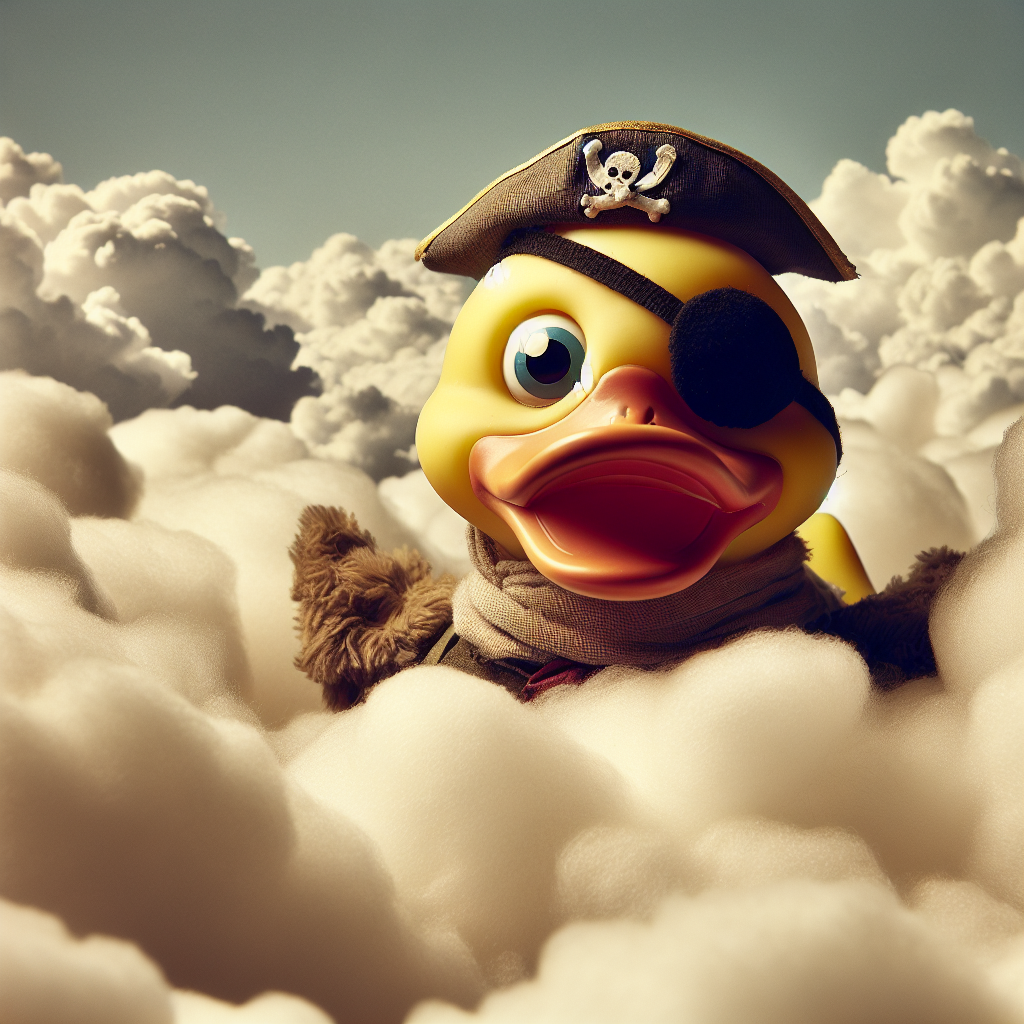

In [271]:
display_image(image_filename)

In [272]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [273]:
unmasker('Artificial Intelligence [MASK] takes over the world')

[{'score': 0.10771944373846054,
  'token': 2855,
  'token_str': 'quickly',
  'sequence': 'artificial intelligence quickly takes over the world'},
 {'score': 0.09412245452404022,
  'token': 1011,
  'token_str': '-',
  'sequence': 'artificial intelligence - takes over the world'},
 {'score': 0.07859906554222107,
  'token': 2974,
  'token_str': 'technology',
  'sequence': 'artificial intelligence technology takes over the world'},
 {'score': 0.07298615574836731,
  'token': 1024,
  'token_str': ':',
  'sequence': 'artificial intelligence : takes over the world'},
 {'score': 0.06956668198108673,
  'token': 2085,
  'token_str': 'now',
  'sequence': 'artificial intelligence now takes over the world'}]

In [274]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [275]:
import pandas as pd
reader = pipeline('question-answering')
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [276]:
ner_tagger = pipeline('ner', aggregation_strategy='simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrainin

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [277]:
!pip install langchain

In [278]:

!pip install pprint
!pip install pandas
!pip install numpy
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [279]:
from collections import Counter
from pprint import pprint
from operator import itemgetter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

import openai
from openai import OpenAI

import transformers
from transformers import pipeline
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results


import langchain
from langchain.chains import create_sql_query_chain
from langchain.tools import DuckDuckGoSearchRun

import langchain_openai
from langchain_openai import ChatOpenAI

import langchain_anthropic
from langchain_anthropic import ChatAnthropic


import langchain_core
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder, PromptTemplate
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.runnables import RunnablePassthrough

import langchain_community
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_community.utilities import SQLDatabase
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [280]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

matplotlib         : 3.7.1
langchain_core     : 0.2.9
langchain_anthropic: 0.1.15
requests           : 2.31.0
PIL                : 9.4.0
transformers       : 4.41.2
langchain          : 0.2.5
langchain_openai   : 0.1.9
langchain_community: 0.2.5
pandas             : 2.0.3
watermark          : 2.4.3
numpy              : 1.25.2
torch              : 2.3.0+cu121
openai             : 1.35.3



In [281]:
model = ChatOpenAI(model="gpt-4o")
messages = [
    SystemMessage(content="What was superman's weakness?")
]
model.invoke(messages)

AIMessage(content="Superman's most well-known weakness is Kryptonite, a radioactive mineral from his home planet of Krypton. Exposure to Kryptonite can weaken Superman significantly, causing him pain and stripping him of his superpowers, and prolonged exposure can be lethal to him. \n\nThere are different types of Kryptonite, with the most common being green Kryptonite. Other variations, like red, blue, gold, and black Kryptonite, have different effects on Superman, ranging from altering his personality to affecting his powers in other unique ways. \n\nIn addition to Kryptonite, Superman also has vulnerabilities to magic and red solar radiation, which can diminish his abilities. Magic can bypass his usual invulnerability, and red solar radiation, similar to the light of Krypton's red sun, can weaken him by depriving him of the energy he absorbs from Earth's yellow sun.", response_metadata={'token_usage': {'completion_tokens': 167, 'prompt_tokens': 13, 'total_tokens': 180}, 'model_name'

In [282]:
parser = StrOutputParser()
result = model.invoke(messages)
parser.invoke(result)

"Superman's primary weakness is Kryptonite, a radioactive mineral from his home planet of Krypton. Exposure to Kryptonite weakens Superman, drains his powers, and can even be lethal if he is exposed to it for prolonged periods. There are different types of Kryptonite, with green Kryptonite being the most common and harmful to him.\n\nAdditionally, Superman is also vulnerable to magic and can be affected by spells and magical artifacts. Another weakness is his susceptibility to red sun radiation, which can strip him of his powers, as Earth's yellow sun is the source of his strength. Lastly, he also has a moral and psychological vulnerability, as his strong sense of justice and compassion can sometimes be exploited by his enemies."

In [283]:
result.response_metadata['token_usage']

{'completion_tokens': 141, 'prompt_tokens': 13, 'total_tokens': 154}

In [284]:
chain = model | parser

In [285]:
chain.invoke(messages)

"Superman's most well-known weakness is Kryptonite, a mineral from his home planet of Krypton. Exposure to Kryptonite, particularly the green variety, weakens Superman and can potentially be fatal if he is exposed to it for an extended period of time. There are other forms of Kryptonite as well, each with different effects; for instance, red Kryptonite causes unpredictable changes in his behavior or powers, while gold Kryptonite can strip him of his powers permanently.\n\nAdditionally, Superman is vulnerable to magic and magical attacks, which can bypass his otherwise nearly invincible defenses. He also relies on the yellow sun of Earth for his powers, so being deprived of its energy, such as by being in an environment with a red sun or in complete darkness for a prolonged period, can weaken him significantly."

In [286]:
system_template = "Translate the following into {language}"

prompt_template = ChatPromptTemplate.from_messages(
         [
          ("system", system_template),
          ("user", "{text}")
          ]

)

result = prompt_template.invoke({"text": "Translate the following into Marathi", "language": "Marathi"})
result


ChatPromptValue(messages=[SystemMessage(content='Translate the following into Marathi'), HumanMessage(content='Translate the following into Marathi')])

In [287]:
chain = prompt_template | model | parser


In [288]:
chain.invoke({"text": "Be the change you want to see in the world", "language": "Marathi"})

'तुम्हाला ज्या बदलाची इच्छा आहे, तो बदल तुम्ही स्वतः होऊन दाखवा.'

In [289]:
os.environ["ANTHROPIC_API_KEY"] = "xxx"
model_a = ChatAnthropic(model_name="claude-1.3" , api_key=os.environ["ANTHROPIC_API_KEY"])


In [290]:
chain_a = prompt_template | model_a | parser

chain_a.invoke({"text": "Be the change you want to see in the world", "language": "Marathi"})

'तुम्हाला जगात पाहिजे असे बदल घडवण्यासाठी तुम्हीच ते बदल व्हा.'

# Message History

In [291]:
store = {}

# Define a simple in-memory message history
class SimpleChatMessageHistory(BaseChatMessageHistory):
    def __init__(self):
        self._messages = []

    @property
    def messages(self):
        return self._messages

    def add_message(self, message):
        self._messages.append(message)

    def clear(self):
        self._messages = []


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = SimpleChatMessageHistory()
    return store[session_id]


with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [292]:
config = { "configurable" : {"session_id" : "abc2"} }




In [293]:
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I am Bob")],
    config=config
)

response.content

'Hello, Bob! How can I assist you today?'

In [294]:

response = with_message_history.invoke(
    [HumanMessage(content="What's my name")],
    config=config
)

response.content

'You mentioned that your name is Bob. How can I help you today, Bob?'

In [295]:
config2 = { "configurable" : {"session_id" : "abc3"} }

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config2
)

response.content

"I don't have access to personal information, so I don't know your name. However, if you'd like to share it, feel free to do so! How can I assist you today?"

In [296]:
prompt = ChatPromptTemplate.from_messages([
          (
              "system",
              "you are a helpful assistant. Answer all questions to the best of your ability."
          ),
          MessagesPlaceholder(variable_name = "messages")
])

chain = prompt | model | parser

In [297]:
response = chain.invoke({"messages": [HumanMessage(content="Hi! I am Bob")]})
response

'Hi Bob! How can I assist you today?'

In [298]:
response = chain.invoke({"messages": [HumanMessage(content="Who am i?")]})
response

"I'm sorry, but I don't have enough information to determine who you are. If you provide more context or details, I might be able to assist you better!"

In [299]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

In [300]:
config3 = { "configurable" : {"session_id" : "abc5"} }

In [301]:
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'am Jim")],
    config=config3
)

response

'Hi Jim! How can I assist you today?'

In [302]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name")],
    config=config3
)

response

'You mentioned that your name is Jim. How can I help you today?'

In [303]:
!pwd

/content


# Database Integration

In [304]:
db = SQLDatabase.from_uri("sqlite:///LangChain/data/Northwind_small.sqlite")

In [305]:
print(db.dialect)

sqlite


In [306]:
print(db.get_usable_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [307]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

In [308]:
write_query = create_sql_query_chain(llm, db)

In [309]:
response = write_query.invoke({"question": "How many customers are there"})
response

'SELECT COUNT("Id") AS TotalCustomers FROM Customer;'

In [310]:
db.run(response)

'[(91,)]'

In [311]:
execute_query = QuerySQLDataBaseTool(db=db)

In [312]:
''

''

In [313]:
sql_chain = write_query | execute_query

In [314]:
sql_chain.invoke({"question": "How many customers are there"})

'[(91,)]'

In [315]:
write_query.invoke({"question": "How many customers are there"})

'SELECT COUNT("Id") AS TotalCustomers FROM Customer;'

In [316]:
response =  RunnablePassthrough.assign(query=write_query).assign(result=itemgetter("query"))
response.invoke({"question": "How many employees are there"})

{'question': 'How many employees are there',
 'query': 'SELECT COUNT("Id") AS TotalEmployees FROM Employee;',
 'result': 'SELECT COUNT("Id") AS TotalEmployees FROM Employee;'}

In [317]:
answer_prompt = PromptTemplate.from_template(
    """Given the following user question, corresponding SQL query, and SQL result, answer the user question.

Question: {question}
SQL Query: {query}
SQL Result: {result}
Answer: """
)

answer = answer_prompt | llm | StrOutputParser()


chain = (
    RunnablePassthrough.assign(query=write_query).assign(
        result=itemgetter("query") | execute_query
    )
    | answer
)


#answer = answer_prompt | llm | StrOutputParser()
#chain = write_query | execute_query | answer


chain.invoke({"question": "How many employees are there"})

'There are a total of 9 employees.'

In [321]:
!pip install -U duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.1 MB/s eta 0:00:00


In [322]:
from langchain.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.run("When will the next solar eclipse be?")

"Find out when and where the next solar and lunar eclipses will occur. The next total solar eclipse will be on April 8, 2024, crossing North America. On April 8, 2024, a total solar eclipse moved across North America, passing over Mexico, the United States, and Canada. A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun. The sky will darken as if it were dawn or dusk. Safety is the number one priority when viewing a total ... It will be 20 years before there's a chance to witness a total solar eclipse in the United States again. According to NASA, after Monday's total solar eclipse, the next one viewable from the ... The next solar eclipse over the United States will be visible in Alaska in 2033. And the next one in the lower 48 states will be in 2045. Here at Vox, we believe in helping everyone understand our ... The next total solar eclipse with a coast-to-coast path spanning the Lower 48 states will occur on August 12

# Information Processing


In [323]:
from collections import Counter
from pprint import pprint
from typing import List, Optional


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import langchain
from langchain.chains.summarize import load_summarize_chain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.llm import LLMChain
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain, create_extraction_chain

import langchain_core
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

import langchain_community
from langchain_community.document_loaders import WebBaseLoader

import langchain_openai
from langchain_openai import ChatOpenAI, OpenAI

import langchain_text_splitters
from langchain_text_splitters import CharacterTextSplitter


import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [324]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

matplotlib              : 3.7.1
langchain_core          : 0.2.9
langchain_anthropic     : 0.1.15
requests                : 2.31.0
PIL                     : 9.4.0
transformers            : 4.41.2
langchain               : 0.2.5
langchain_openai        : 0.1.9
langchain_community     : 0.2.5
pandas                  : 2.0.3
watermark               : 2.4.3
numpy                   : 1.25.2
langchain_text_splitters: 0.2.1
torch                   : 2.3.0+cu121
openai                  : 1.35.3



# Text Summarization

In [325]:
prompt_template = """Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:"""

In [326]:
text = """The history of Portugal can be traced from circa 400,001 years ago, when the region of present-day Portugal was inhabited by Homo heidelbergensis.

The Roman conquest of the Iberian Peninsula, which lasted almost two centuries, led to the establishment of the provinces of Lusitania in the south and Gallaecia in the north of what is now Portugal. Following the fall of Rome, Germanic tribes controlled the territory between the 5th and 8th centuries, including the Kingdom of the Suebi centred in Braga and the Visigothic Kingdom in the south.

The 711–716 invasion by the Islamic Umayyad Caliphate conquered the Visigoth Kingdom and founded the Islamic State of Al-Andalus, gradually advancing through Iberia. In 1095, Portugal broke away from the Kingdom of Galicia. Afonso Henriques, son of the count Henry of Burgundy, proclaimed himself king of Portugal in 1139. The Algarve (the southernmost province of Portugal) was conquered from the Moors in 1249, and in 1255 Lisbon became the capital. Portugal's land boundaries have remained almost unchanged since then. During the reign of King John I, the Portuguese defeated the Castilians in a war over the throne (1385) and established a political alliance with England (by the Treaty of Windsor in 1386).

From the late Middle Ages, in the 15th and 16th centuries, Portugal ascended to the status of a world power during Europe's "Age of Discovery" as it built up a vast empire. Signs of military decline began with the Battle of Alcácer Quibir in Morocco in 1578; this defeat led to the death of King Sebastian and the imprisonment of much of the high nobility, which had to be ransomed at great cost. This eventually led to a small interruption in Portugal's 800-year-old independence by way of a 60-year dynastic union with Spain between 1580 and the beginning of the Portuguese Restoration War led by John IV in 1640. Spain's disastrous defeat in its attempt to conquer England in 1588 by means of the Invincible Armada was also a factor, as Portugal had to contribute ships for the invasion. Further setbacks included the destruction of much of its capital city in an earthquake in 1755, occupation during the Napoleonic Wars, and the loss of its largest colony, Brazil, in 1822. From the middle of the 19th century to the late 1950s, nearly two million Portuguese left Portugal to live in Brazil and the United States.[1]

In 1910, a revolution deposed the monarchy. A military coup in 1926 installed a dictatorship that remained until another coup in 1974. The new government instituted sweeping democratic reforms and granted independence to all of Portugal's African colonies in 1975. Portugal is a founding member of NATO, the Organisation for Economic Co-operation and Development (OECD), the European Free Trade Association (EFTA), and the Community of Portuguese Language Countries. It entered the European Economic Community (now the European Union) in 1986.
"""

In [330]:
summary_prompt = PromptTemplate.from_template(prompt_template).invoke(text)
summary_prompt

StringPromptValue(text='Write a concise summary of the following:\n"The history of Portugal can be traced from circa 400,001 years ago, when the region of present-day Portugal was inhabited by Homo heidelbergensis.\n\nThe Roman conquest of the Iberian Peninsula, which lasted almost two centuries, led to the establishment of the provinces of Lusitania in the south and Gallaecia in the north of what is now Portugal. Following the fall of Rome, Germanic tribes controlled the territory between the 5th and 8th centuries, including the Kingdom of the Suebi centred in Braga and the Visigothic Kingdom in the south.\n\nThe 711–716 invasion by the Islamic Umayyad Caliphate conquered the Visigoth Kingdom and founded the Islamic State of Al-Andalus, gradually advancing through Iberia. In 1095, Portugal broke away from the Kingdom of Galicia. Afonso Henriques, son of the count Henry of Burgundy, proclaimed himself king of Portugal in 1139. The Algarve (the southernmost province of Portugal) was con

In [331]:
llm = OpenAI(temperature=0)
output = llm(summary_prompt.text)
output

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


" Portugal's history dates back to 400,001 years ago when it was inhabited by Homo heidelbergensis. It was later conquered by the Romans and then controlled by Germanic tribes. In 711, it was invaded by the Islamic Umayyad Caliphate and eventually broke away from the Kingdom of Galicia in 1095. Portugal became a world power during the Age of Discovery in the 15th and 16th centuries, but suffered setbacks such as defeat in the Battle of Alcácer Quibir and the loss of its largest colony, Brazil. In 1910, a revolution deposed the monarchy and a dictatorship was installed until 1974 when a democratic government was established. Portugal is a member of various international organizations and joined the European Union in 1986."

# Summarizing a web document

In [332]:
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
chain = load_summarize_chain(llm, chain_type="stuff")
result = chain.invoke(docs)
print(result["output_text"])

The article discusses the concept of building autonomous agents powered by Large Language Models (LLMs). It covers key components such as planning, memory, and tool use, along with case studies and proof-of-concept examples. Challenges include the finite context length, reliability of natural language interfaces, and difficulties in long-term planning and task decomposition. The article also provides references for further reading.


In [334]:
prompt = PromptTemplate.from_template(prompt_template)
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
llm_chain = LLMChain(prompt=prompt, llm=llm)

stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

docs = loader.load()
print(stuff_chain.invoke(docs)["output_text"])



The article discusses the concept of building autonomous agents powered by Large Language Models (LLMs). It covers components such as planning, memory, and tool use, with examples like AutoGPT and GPT-Engineer. Challenges include limited context length, planning difficulties, and reliability of natural language interfaces. The article also references various studies and projects in the field of LLM-powered agents.


#Mapreduce

In [335]:
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

In [336]:
map_template =  """The following is a set of documents
{docs}
Based on this list of docs, please identify the main themes
Helpful Answer:"""


In [337]:
map_prompt = PromptTemplate.from_template(map_template)

In [338]:
map_chain = LLMChain(llm=llm, prompt=map_prompt)

In [340]:
reduce_template = """The following is set of summaries:
{docs}
Take these and distill it into a final, consolidated summary of the main themes.
Helpful Answer:"""

reduce_prompt = PromptTemplate.from_template(reduce_template)
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)


In [345]:
combine_documents_chain = StuffDocumentsChain(llm_chain=reduce_chain, document_variable_name="docs")


In [346]:
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

In [347]:
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)

In [348]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size = 1000,
    chunk_overlap = 0
)

split_docs = text_splitter.split_documents(docs)

In [349]:
type(split_docs[0])

langchain_core.documents.base.Document

In [352]:
len(split_docs)

14

In [353]:
print(split_docs[10].page_content)

You will get instructions for code to write.
You will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.
Make sure that every detail of the architecture is, in the end, implemented as code.
Think step by step and reason yourself to the right decisions to make sure we get it right.
You will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.
Then you will output the content of each file including ALL code.
Each file must strictly follow a markdown code block format, where the following tokens must be replaced such that
FILENAME is the lowercase file name including the file extension,
LANG is the markup code block language for the code’s language, and CODE is the code:
FILENAME
CODE
You will start with the “entrypoint” file, then go to the ones that are imported by that file, and so on.
Please note that the code should be fully functional. No placeh

In [354]:
result = map_reduce_chain.invoke(split_docs)

print(result["output_text"])

The main themes identified in the set of documents revolve around the use of large language models (LLMs) in autonomous agents, task planning, memory utilization, tool augmentation, reinforcement learning, and the application of LLMs in various domains such as scientific research, human behavior simulation, and information retrieval. The documents also discuss challenges in using LLMs in real-world applications, the importance of memory and planning mechanisms in generative agents, and the potential for LLMs to extend human capabilities through tool use. Additionally, there is a focus on software architecture, code organization, and implementation best practices in developing systems with multiple classes and functions, particularly in Python.


# Information Extraction
Based on https://python.langchain.com/v0.1/docs/use_cases/extraction/quickstart/

In [355]:
data = pd.read_csv('LangChain/data/trump.csv')
data.head()

,text,created_at,id_str
0,.@FoxNews is no longer the same. We miss the g...,05-19-2020 01:59:49,1262563582086184970
1,So the so-called HHS Whistleblower was against...,05-18-2020 14:44:21,1262393595560067073
2,.....mixed about even wanting us to get out. T...,05-18-2020 14:39:40,1262392415513690112
3,Wow! The Front Page @washingtonpost Headline r...,05-18-2020 12:47:40,1262364231288197123
4,MAGA crowds are bigger than ever! https://t.co...,05-18-2020 12:26:37,1262358931982123008


In [356]:
class Person(BaseModel):
    """Information about a person."""
    name: Optional[str] = Field(default=None, description="The name of the person")
    twitter_handle: Optional[str] = Field(
        default=None, description="The twitter handle if known"
    )

class Data(BaseModel):
    """Extracted data about people."""

    # Creates a model so that we can extract multiple entities.
    people: List[Person]

In [357]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert extraction algorithm. "
            "Only extract relevant information from the text. "
            "If you do not know the value of an attribute asked to extract, "
            "return null for the attribute's value.",
        ),
        ("human", "{text}"),
    ]
)

In [358]:
runnable = prompt | llm.with_structured_output(schema=Data)

In [359]:
for tweet in data['text'].head(10):
    response = runnable.invoke({"text": tweet})
    print(response)

people=[Person(name='Roger Ailes', twitter_handle=None)]
people=[Person(name="Norah O'Donnell", twitter_handle='NorahODonnell')]
people=[Person(name='unknown', twitter_handle=None)]
people=[Person(name='Obama', twitter_handle=None)]
people=[Person(name='MAGA crowds', twitter_handle=None)]
people=[Person(name=None, twitter_handle='SecAzar')]
people=[Person(name="Norah O'Donnell", twitter_handle=None)]
people=[Person(name='boaters', twitter_handle=None)]
people=[Person(name='The United States', twitter_handle=None)]
people=[Person(name='Sleepy Joe Biden', twitter_handle=None)]


#ChatBots

In [360]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import langchain

from langchain.prompts import PromptTemplate
from langchain.document_loaders import GutenbergLoader

from langchain.memory import ConversationBufferMemory
from langchain.memory.chat_message_histories.in_memory import ChatMessageHistory

from langchain.schema import messages_from_dict, messages_to_dict

from langchain.agents import Tool
from langchain.agents import initialize_agent
from langchain.agents import AgentType

from langchain.chains import LLMChain, ConversationalRetrievalChain, ConversationChain
from langchain.chains import RetrievalQA

from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

import langchain_openai
from langchain_openai import ChatOpenAI

import tempfile

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [361]:
cache_dir = "./cache"

In [362]:
loader = GutenbergLoader(
    "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"
)

document = loader.load()

extrait = ' '.join(document[0].page_content.split()[:100])
display(extrait + " .......")

'The Project Gutenberg eBook of Romeo and Juliet This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: Romeo and Juliet Author: William Shakespeare Release date: November .......'

In [363]:
text_splitter = CharacterTextSplitter(
    chunk_size=1024, # Each chunk is of size 1024
    chunk_overlap=256 # Neigboring chunks overlap by 256 characters
)

texts = text_splitter.split_documents(document)

In [365]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [366]:
model_name = "sentence-transformers/all-MiniLM-L6-v2"

embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    cache_folder=cache_dir
)  # Use a pre-cached model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [368]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.7

In [369]:
vectordb = Chroma.from_documents(
    texts,
    embeddings,
    persist_directory=cache_dir
)

In [370]:
question = "Romeo!"

docs = vectordb.similarity_search(question, k=2)

# Check the length of the document
print(len(docs))

# Check the content of the first document
print(docs[0].page_content)
print("="*20)
print(docs[1].page_content)

2
That same villain Romeo.





JULIET.


Villain and he be many miles asunder.


God pardon him. I do, with all my heart.


And yet no man like he doth grieve my heart.





LADY CAPULET.


That is because the traitor murderer lives.





JULIET.


Ay madam, from the reach of these my hands.


Would none but I might venge my cousin’s death.





LADY CAPULET.


We will have vengeance for it, fear thou not.


Then weep no more. I’ll send to one in Mantua,


Where that same banish’d runagate doth live,


Shall give him such an unaccustom’d dram


That he shall soon keep Tybalt company:


And then I hope thou wilt be satisfied.





JULIET.


Indeed I never shall be satisfied


With Romeo till I behold him—dead—


Is my poor heart so for a kinsman vex’d.


Madam, if you could find out but a man


To bear a poison, I would temper it,


That Romeo should upon receipt thereof,


Soon sleep in quiet. O, how my heart abhors


To hear him nam’d, and cannot come to him,
That fair for which love

In [371]:
retriever = vectordb.as_retriever()

In [372]:
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0)

In [373]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)

In [374]:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [375]:
query = "What is Juliets family?"

query_results_venice = qa.invoke(query)
print("#" * 12)
query_results_venice['result']

############


"Juliet's family is the Capulets. Thanks for asking!"

In [376]:
query = "What happens to Romeo and Juliet?"
query_results_romeo = qa.invoke(query)
print("#" * 12)
query_results_romeo['result']

############


'Romeo is banished, and Juliet is left behind in Verona. Romeo and Juliet are separated due to the feud between their families. Thanks for asking!'

In [377]:
query = "Who is Mercutio?"
query_results_romeo = qa.invoke(query)
print("#" * 12)
query_results_romeo['result']

############


'Mercutio is a character in William Shakespeare\'s play "Romeo and Juliet." He is a close friend of Romeo and is known for his wit and humor. Thanks for asking!'

In [378]:
query = "Does Romeo live?"
qa_chain_docs = RetrievalQA.from_chain_type(llm,
                                       retriever=vectordb.as_retriever(),
                                       # Return source documents
                                       return_source_documents=True,
                                       chain_type_kwargs={"prompt": QA_CHAIN_PROMPT})


result = qa_chain_docs({"query": question})
result["result"]

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


"Romeo is the villain who killed Juliet's cousin Tybalt. Lady Capulet wants to send someone to Mantua to kill Romeo in revenge for Tybalt's death. Juliet is not satisfied until Romeo is dead. Thanks for asking!"

In [379]:
len(result['source_documents'])

4

In [380]:
print(result['source_documents'][3].page_content)

Romeo slew Tybalt, Romeo must not live.





PRINCE.


Romeo slew him, he slew Mercutio.


Who now the price of his dear blood doth owe?





MONTAGUE.


Not Romeo, Prince, he was Mercutio’s friend;


His fault concludes but what the law should end,


The life of Tybalt.





PRINCE.


And for that offence


Immediately we do exile him hence.


I have an interest in your hate’s proceeding,


My blood for your rude brawls doth lie a-bleeding.


But I’ll amerce you with so strong a fine


That you shall all repent the loss of mine.


I will be deaf to pleading and excuses;


Nor tears nor prayers shall purchase out abuses.


Therefore use none. Let Romeo hence in haste,


Else, when he is found, that hour is his last.


Bear hence this body, and attend our will.


Mercy but murders, pardoning those that kill.





 [_Exeunt._]





SCENE II. A Room in Capulet’s House.





 Enter Juliet.





JULIET.


Gallop apace, you fiery-footed steeds,


#Prompt ENg

In [381]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import langchain
from langchain import PromptTemplate
from langchain import FewShotPromptTemplate
from langchain.prompts.example_selector import LengthBasedExampleSelector

import langchain_openai
from langchain_openai import ChatOpenAI

import watermark

%load_ext watermark
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [382]:
prompt = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: """

In [383]:
openai = ChatOpenAI(
    model_name="gpt-3.5-turbo",
)

In [384]:
openai.invoke(prompt).content

"Hugging Face's `transformers` library, OpenAI's `openai` library, and Cohere's `cohere` library offer Large Language Models (LLMs)."

In [385]:
template = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: {query}

Answer: """

prompt_template = PromptTemplate(
    input_variables=["query"],
    template=template
)

In [386]:
prompt = prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )

print(prompt)

Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: 


In [387]:
openai.invoke(prompt).content

"Hugging Face's `transformers` library, OpenAI's `openai` library, and Cohere's `cohere` library offer Large Language Models (LLMs)."

# Few Shot Prompting

In [388]:
prompt = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:

User: How are you?
AI: I can't complain but sometimes I still do.

User: What time is it?
AI: It's time to get a watch.

User: What is the meaning of life?
AI: """

In [389]:
print(openai.invoke(prompt).content)

I'm still trying to figure that out myself. Maybe it involves lots of coffee and naps.


In [390]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]


In [391]:
example_template = """
User: {query}
AI: {answer}
"""

In [392]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template
)

In [393]:
example_prompt

PromptTemplate(input_variables=['answer', 'query'], template='\nUser: {query}\nAI: {answer}\n')

In [394]:
prefix = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:
"""

suffix = """
User: {query}
AI: """

In [395]:
few_shot_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [396]:
query = "What is the meaning of life?"

In [397]:
print(few_shot_prompt_template.format(query=query))


The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: What is the meaning of life?
AI: 42



User: What is the weather like today?
AI: Cloudy with a chance of memes.



User: What is your favorite movie?
AI: Terminator



User: Who is your best friend?
AI: Siri. We have spirited debates about the meaning of life.



User: What should I do today?
AI: Stop talking to chatbots on the internet and go outside.



User: What is the meaning of life?
AI: 


In [398]:
example_selector = LengthBasedExampleSelector(
    examples=examples,
    example_prompt=example_prompt,
    max_length=50  # this sets the max length that examples should be
)

In [399]:
dynamic_prompt_template = FewShotPromptTemplate(
    example_selector=example_selector,  # use example_selector instead of examples
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n"
)

In [400]:
print(dynamic_prompt_template.format(query="How do birds fly?"))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 


User: How are you?
AI: I can't complain but sometimes I still do.


User: What time is it?
AI: It's time to get a watch.


User: What is the meaning of life?
AI: 42


User: How do birds fly?
AI: 


In [401]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

print(dynamic_prompt_template.format(query=query))

The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 


User: How are you?
AI: I can't complain but sometimes I still do.


User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 


# Chain of thought prompts

In [402]:
cot_examples = [
    {
        "query": "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?",
        "answer": "The answer is 11",
        "cot": "Roger started with 5 tennis balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5 + 6 = 11"
    },

    {
        "query": "A juggler can juggle 16 balls. Half of the balls are golf balls and half of the golf balls are blue. How many blue golf balls are there?",
        "answer": "The answer is 4",
        "cot": "The juggler can juggle 16 balls. Half of the balls are golf balls. So there are 16/2=8 golf balls. Half of the golf balls are blue. So there are 8/2=4 golf balls."
    }
]

In [403]:
cot_example_template = """
    User: {query}
    AI: {cot}
    {answer}
"""

In [404]:
cot_example_prompt = PromptTemplate(
    input_variables=["query", "answer", "cot"],
    template=cot_example_template
)

In [405]:
cot_example_prompt

PromptTemplate(input_variables=['answer', 'cot', 'query'], template='\n    User: {query}\n    AI: {cot}\n    {answer}\n')

In [406]:
cot_prefix = """The following are exerpts from conversations with an AI
assistant. The assistant is smart and thinks through each step of the problem. Here are some examples:
"""

cot_suffix = """
User: {query}
AI: """

In [407]:
cot_few_shot_prompt_template = FewShotPromptTemplate(
    examples=cot_examples,
    example_prompt=cot_example_prompt,
    prefix=cot_prefix,
    suffix=cot_suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [408]:
cot_query = "I have a deck of 52 cards. There are 4 suits of equal size. Each suit has 3 face cards. How many face cards are there in total?"

In [409]:
print(cot_few_shot_prompt_template.format(query=cot_query))

The following are exerpts from conversations with an AI
assistant. The assistant is smart and thinks through each step of the problem. Here are some examples: 



    User: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?
    AI: Roger started with 5 tennis balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5 + 6 = 11
    The answer is 11



    User: A juggler can juggle 16 balls. Half of the balls are golf balls and half of the golf balls are blue. How many blue golf balls are there?
    AI: The juggler can juggle 16 balls. Half of the balls are golf balls. So there are 16/2=8 golf balls. Half of the golf balls are blue. So there are 8/2=4 golf balls.
    The answer is 4



User: I have a deck of 52 cards. There are 4 suits of equal size. Each suit has 3 face cards. How many face cards are there in total?
AI: 


In [410]:
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
)

In [411]:
print(llm.invoke(cot_few_shot_prompt_template.format(query=cot_query)).content)

Each suit has 3 face cards, so there are 4*3=12 face cards in total.
The answer is 12.


# Zero Shot

In [412]:
cot_zero_shot_template = """\
Q. {query}
A. Let's think step by step
"""

In [413]:
cot_zero_shot_prompt = PromptTemplate(
       input_variables=["query"],
       template=cot_zero_shot_template
)

In [414]:
query = "On average Joe throws 25 punches per minute. A fight lasts 5 rounds of 3 minutes each. How many punches does Joe throw?"

In [415]:
print(llm.invoke(cot_zero_shot_prompt.format(query=query)).content)

1. Joe throws 25 punches per minute, so in 1 round (3 minutes) he throws 25 x 3 = 75 punches.
2. Since there are 5 rounds in a fight, Joe throws 75 x 5 = 375 punches in total. 

Therefore, Joe throws 375 punches in the entire fight.


In [416]:
print(llm.invoke(cot_zero_shot_prompt.format(query=cot_examples[0]["query"])).content)

1. Roger starts with 5 tennis balls
2. He buys 2 cans of tennis balls, each containing 3 tennis balls
3. 2 cans x 3 tennis balls = 6 tennis balls
4. Now add the 6 tennis balls from the cans to the 5 tennis balls he already had
5. 5 + 6 = 11
6. Roger now has 11 tennis balls.
